In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load data
from google.colab import files
uploaded=files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
df=pd.read_csv('cardio_train.csv',sep=';')

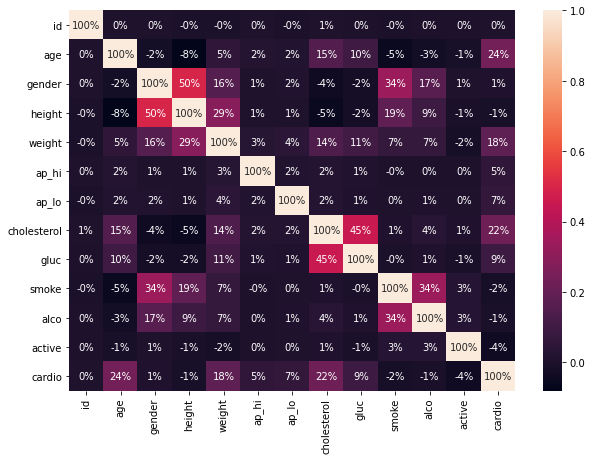

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
#df=pd.get_dummies(df,columns=['gender','cholesterol','gluc'])

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


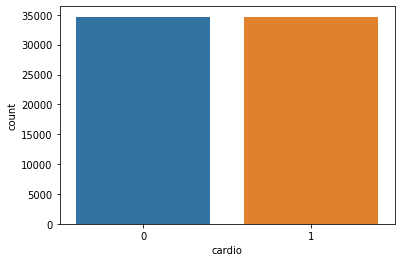

In [ ]:
sns.countplot(df['cardio']);

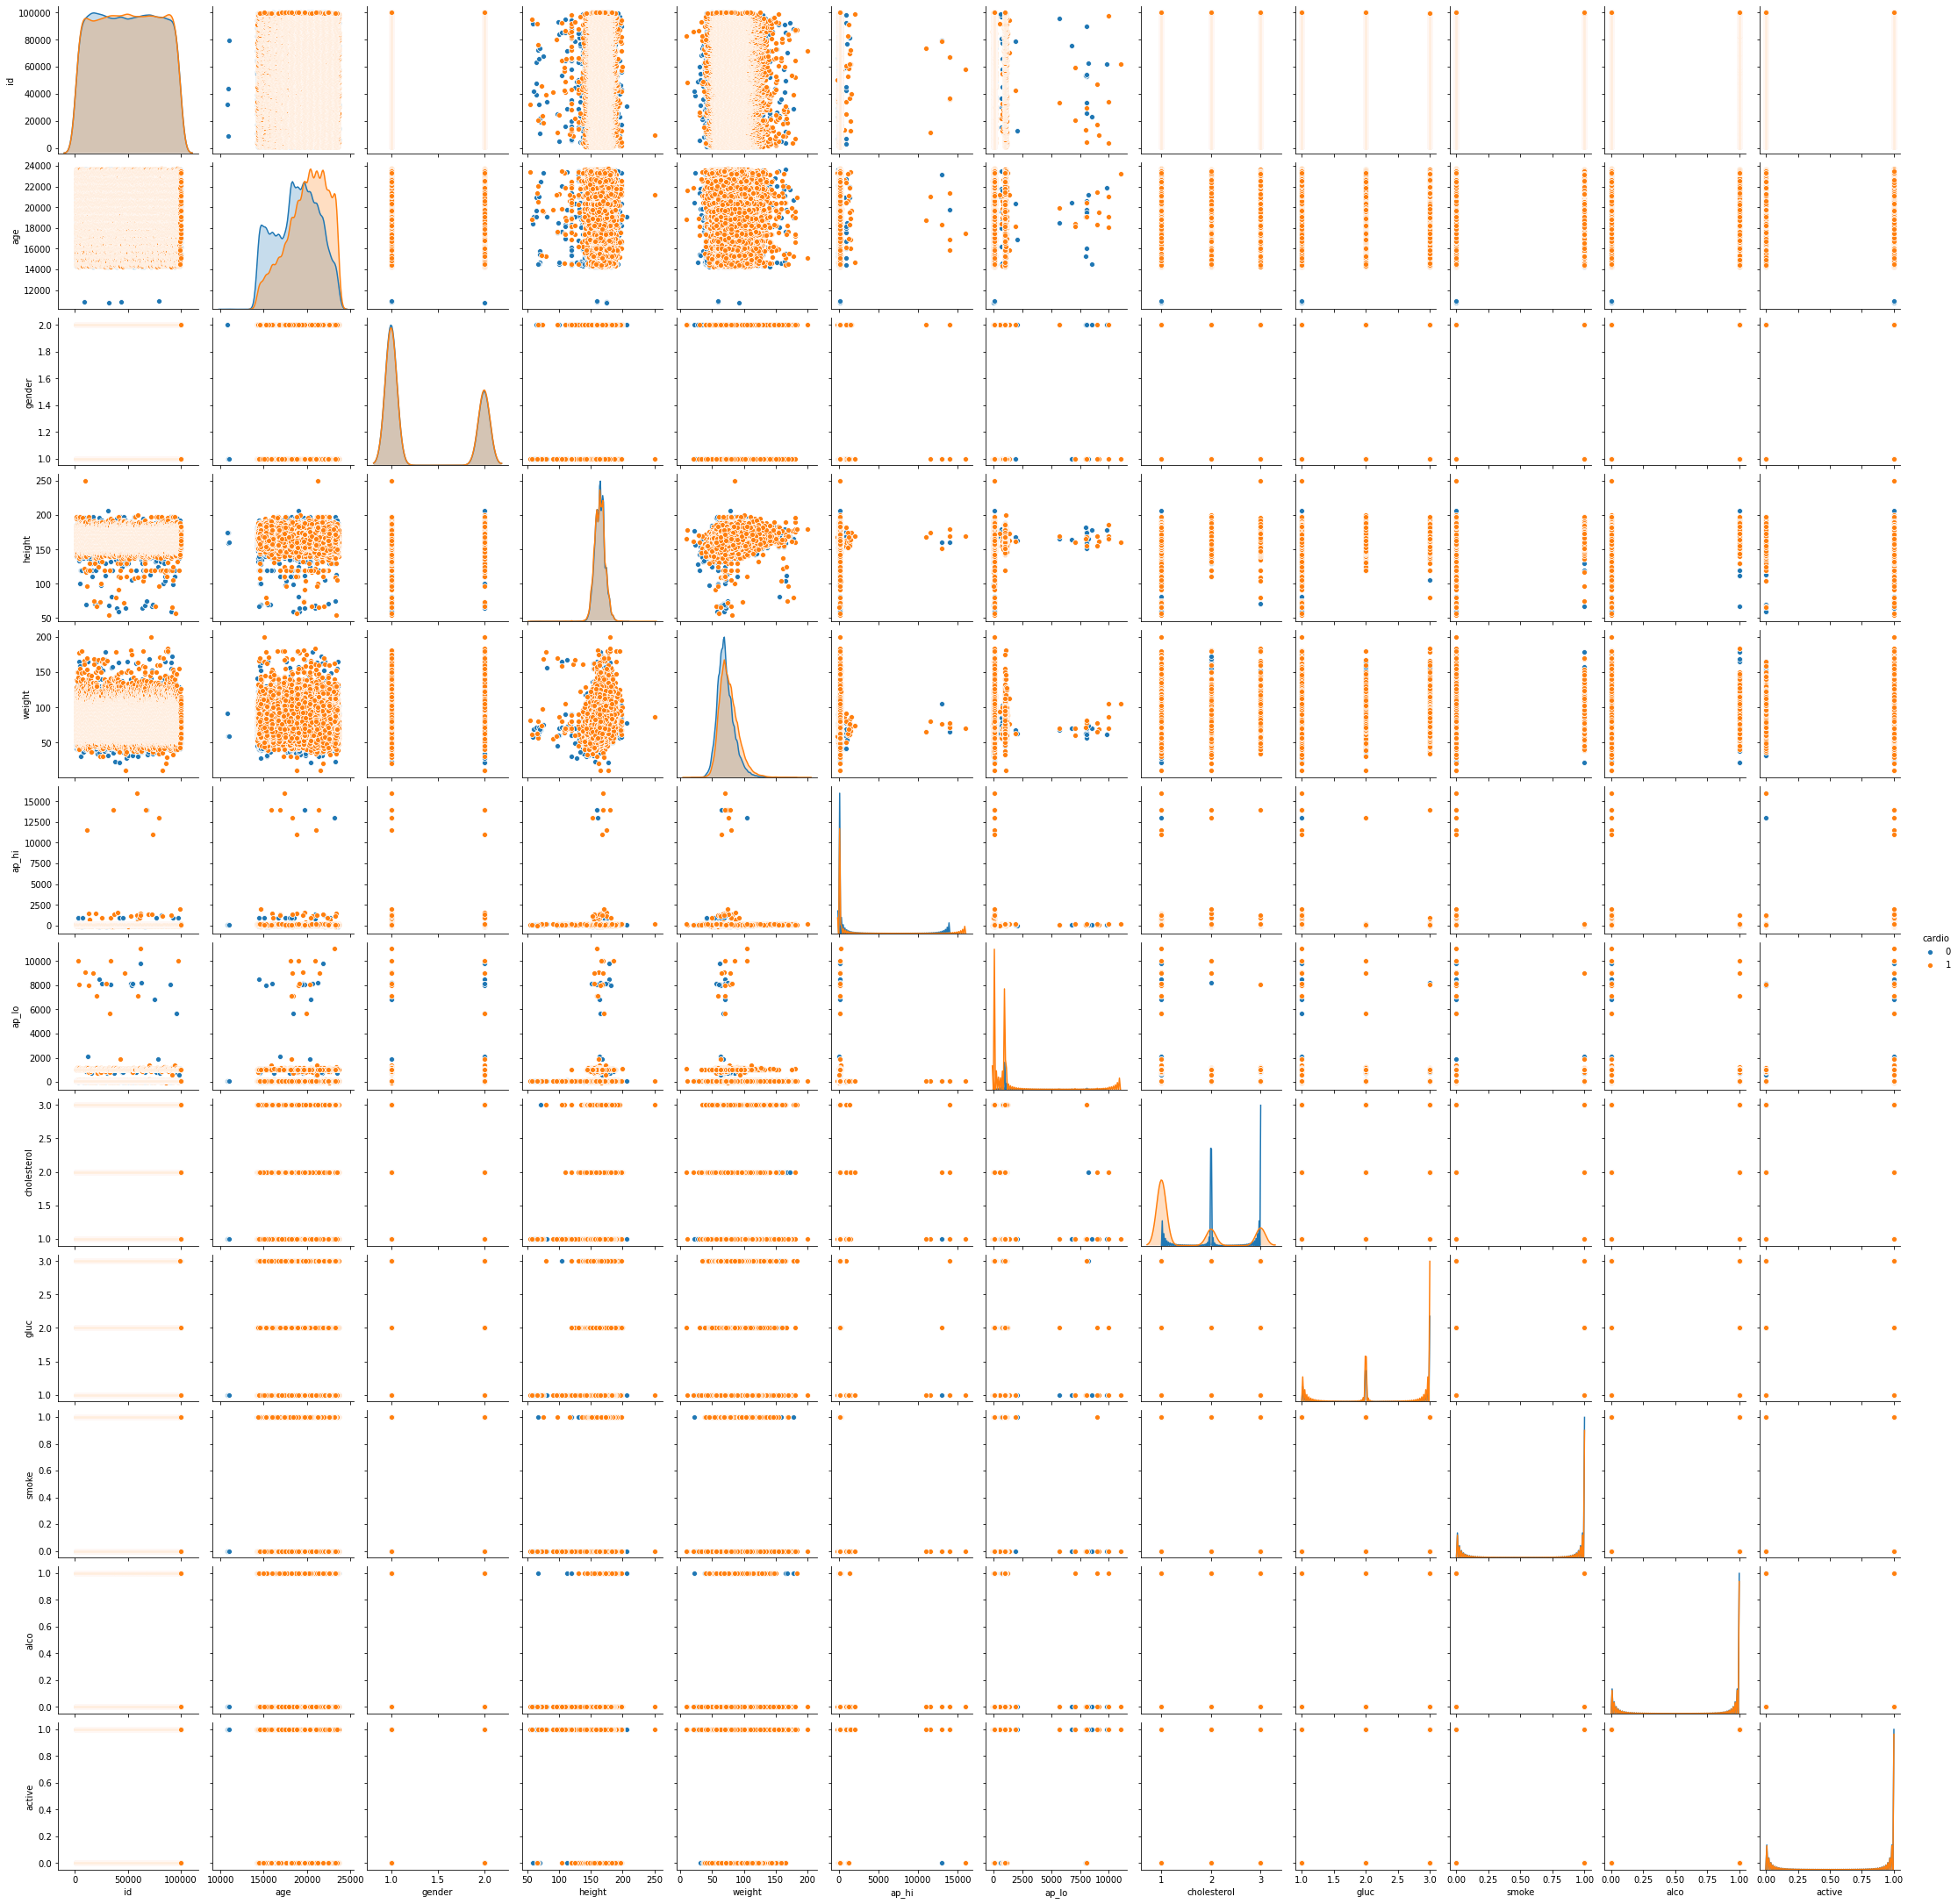

In [ ]:
sns.pairplot(data=df,hue='cardio');

In [ ]:
df['years']=(df['age']/365).round(0)
df['years'].head(2)

0    62.0
1    40.0
Name: years, dtype: float64

In [ ]:
df['years']=pd.to_numeric(df['years'],downcast='integer')
df['years'].head(2)

0    62
1    40
Name: years, dtype: int8

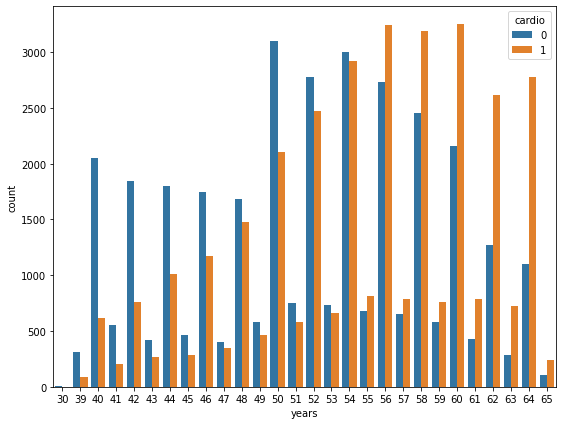

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(x='years',hue='cardio',data=df);


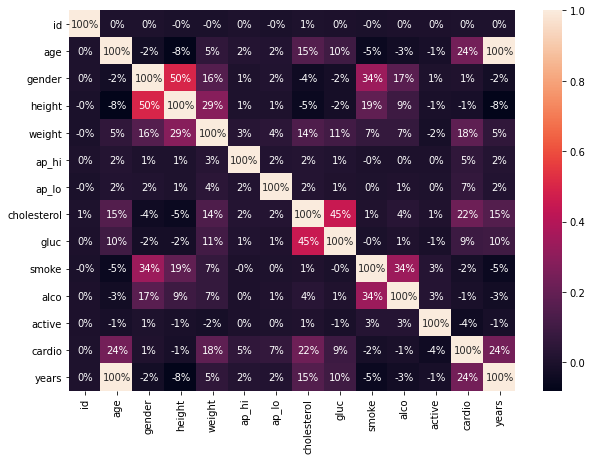

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

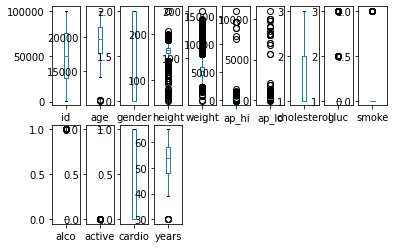

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,10));

In [ ]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(69301, 14)
(55140, 14)


In [ ]:
df=df_final
df.shape

(55140, 14)

In [ ]:
df=df.drop(['id','height','years'],axis=1)

In [ ]:
df.shape

(55140, 11)

In [ ]:
 from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [ ]:
df_x=df.drop('cardio',axis=1)
y=df['cardio']


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=StandardScaler()
columns_to_scale=['weight','age','ap_hi','ap_lo']
df_x[columns_to_scale]=ss.fit_transform(df[columns_to_scale])
df_x.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.226812,1,-0.300981,0.245909,-0.098609,2,2,0,0,1
1,-1.938532,1,-0.147224,-0.880429,-1.078339,1,1,0,0,1
2,0.996929,1,-0.224102,-0.317260,-0.098609,1,1,0,0,1
4,1.600776,1,-0.839130,-0.317260,-0.098609,1,1,0,0,1
5,0.690148,1,-0.916008,-1.443598,-1.078339,1,1,0,0,1


In [ ]:

x=pd.DataFrame(df_x)
x

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.226812,1,-0.300981,0.245909,-0.098609,2,2,0,0,1
1,-1.938532,1,-0.147224,-0.880429,-1.078339,1,1,0,0,1
2,0.996929,1,-0.224102,-0.317260,-0.098609,1,1,0,0,1
4,1.600776,1,-0.839130,-0.317260,-0.098609,1,1,0,0,1
5,0.690148,1,-0.916008,-1.443598,-1.078339,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
69293,-0.261357,1,-1.300401,2.498585,0.881121,1,1,0,0,1
69294,0.105727,1,-0.224102,0.245909,0.881121,1,1,0,0,1
69295,0.662222,1,0.544683,1.372247,-0.098609,1,1,0,0,1
69299,1.211432,1,-0.070345,0.527493,-0.098609,1,2,0,0,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_train,y_train)

0.7254035183170112

In [ ]:

model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

In [ ]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.7262422923467537


cross_val is  0.725480594849474


F1_score is 0.6955118507312154


roc_auc_score 0.7238392568968657


classification report               precision    recall  f1-score   support

           0       0.71      0.80      0.75      5682
           1       0.75      0.64      0.70      5346

    accuracy                           0.73     11028
   macro avg       0.73      0.72      0.72     11028
weighted avg       0.73      0.73      0.72     11028



confusion matrix
 [[4561 1121]
 [1898 3448]]


********************** SVC ************************
SVC(C=1.0, break_ti

In [ ]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,72.624229,72.548059,69.551185,72.383926
1,SVC,73.648894,73.373232,70.231510,73.367232
2,Kneighbors,69.432354,69.221980,67.879943,69.349475
3,DecisionTreeClassifier,63.520131,63.115705,62.136471,63.467707
4,GaussianNB,69.822271,69.943779,64.505119,69.430312
5,RandomForestClassifier,69.024302,68.692419,67.858487,68.977822
6,GradientBoostingClassifier,73.621690,73.322452,71.200871,73.433749
7,XGBoostClassifier,73.648894,73.365978,71.261867,73.464020
8,AdBoostingClassifier,73.141095,72.914400,69.558068,72.850113


In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
gd=GridSearchCV(rf,param_grid=[{'n_estimators':[50,100,150,200],
                                'criterion':['gini','entropy'],
                                 
                                 'max_depth':[2,3,4,6,8]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)
                       

0.7317739005396774
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 150}


In [ ]:
sv=SVC(gamma='auto')
svgd=GridSearchCV(sv,param_grid=[{'kernel':['rbf','poly','linear','sigmoid']}],cv=5)
svgd.fit(x_train,y_train)
print(svgd.best_score_)
print(svgd.best_params_)
                        

0.7318872509513723
{'kernel': 'rbf'}


In [ ]:
gb=GradientBoostingClassifier()
gbgd=GridSearchCV(gb,param_grid=[{'n_estimators':[i for i in range(100,200,20)],
                                  'max_depth':[i for i in range(1,10,1)]}],cv=5)
gbgd.fit(x_train,y_train)
print(gbgd.best_score_)
print(gbgd.best_params_)

0.7330207936106484
{'max_depth': 3, 'n_estimators': 160}


In [ ]:
xgb=XGBClassifier()
xgbgd=GridSearchCV(xgb,param_grid=[{'n_estimators':[i for i in range(100,200,20)],
                                  'max_depth':[i for i in range(1,10,1)]}],cv=5)
xgbgd.fit(x_train,y_train)
print(xgbgd.best_score_)
print(xgbgd.best_params_)

0.7328620583251773
{'max_depth': 5, 'n_estimators': 120}


No handles with labels found to put in legend.


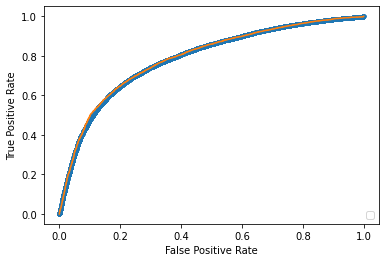

In [32]:
lr.fit(x_train,y_train)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr_train_probs[:,1]
lr_test_probs=lr_test_probs[:,1]
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
plt.plot(lr_train_fpr,lr_train_tpr,marker='.')
plt.plot(lr_test_fpr,lr_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()